In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
test = pd.read_excel("/home/falk-stankat/Downloads/2025-06-17-Rohdaten von Umfrage DIsy_Masterarbeit_2it (alle Teilnehmer).ods",   engine="odf")

a) Genauigkeit der Daten

b) Relevanz und Fokus

c) Struktur und Organisation

d) Flüssigkeit - Lesbarkeit und Verständlichkeit

e) Allgemeine Qualität des LLM 

f) Problemfelder

g) Produktionsreife

h) Produktionsreife 

i) Berichtsvariationen



# Daten bereinigen

## Bereinigen der Überschriften

In [ ]:
def clean_headers(text):

    match = re.search(r'(\d+)\.([a-zA-Z])\)', text)

    if match:
        transformed = f"{match.group(1)} - {match.group(2)}"


    return transformed if match else text

In [5]:
test.columns = [clean_headers(header) for header in test.columns]

In [ ]:
pattern = r'^\d+\s*-\s*[a-zA-Z]$'

matching_columns = test.columns[test.columns.str.match(pattern)]

In [7]:
df = test[matching_columns]

In [8]:
df

,1 - a,1 - b,1 - c,1 - d,1 - e,1 - f,1 - f,1 - f,1 - f,1 - g,...,7 - t,7 - t,7 - u,7 - u,7 - u,7 - u,8 - a,8 - b,8 - c,9 - a
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4: Meistens genau – Fast alle Daten sind korre...,5: Überwiegend relevant – die Inhalte behandel...,6: Ausgezeichnet strukturiert - Der Berichtste...,3: Teilweise flüssig – Der Text ist in einigen...,4. befriedigend,keine,Wortwiederholungen oder ungeschickte Formulier...,keine,Wortwiederholungen oder ungeschickte Formulier...,Gut: allgemeine Zusammenhänge scheinen logisch...,...,3.0,Manchmal etwas zu reißerisch oder auf ein konk...,Mir ist ehrlich gesagt der Unterschied zur Web...,s. o.,Mir ist ehrlich gesagt der Unterschied zur Web...,s. o.,Sprachliche und inhaltliche Verbesserungen Zus...,"Ja, definitiv. Bisher müssen die einzelnen Kom...","Ja, auf jeden Fall, obwohl ich anfangs noch ve...",Inhaltliche Anmerkungen: Die LLMs machen hin u...
2,6: Vollständig genau – Alle Daten im Bericht s...,5: Überwiegend relevant – die Inhalte behandel...,5: Sehr gut strukturiert - eine klare Berichts...,4: Meistens flüssig – Der Text ist größtenteil...,4. befriedigend,Beim Text-Abschnitt Sonnenschein wird der Begi...,Der Titelgenerator ist etwas reißerich und ori...,Beim Text-Abschnitt Sonnenschein wird der Begi...,Der Titelgenerator ist etwas reißerich und ori...,Lieber weniger Schlussvolgerungen durch die KI...,...,8.0,Hat etwas an Bild oder Springer-Presse allgeme...,NaN,NaN,NaN,NaN,"Ja, das Tool ist erheblich besser geworden! Nu...","Ja, alleine die Datenaufbereitung, wenn sie de...","Unbedingt, dadurch wird erheblich an Zeit gesp...","Weniger Vergleiche Köln Wartsein im Fließtext,..."
3,6: Vollständig genau – Alle Daten im Bericht s...,5: Überwiegend relevant – die Inhalte behandel...,5: Sehr gut strukturiert - eine klare Berichts...,4: Meistens flüssig – Der Text ist größtenteil...,6. sehr gut,NaN,NaN,NaN,NaN,Unterschiedliche Stile der Sprachmodelle sind ...,...,0.0,angemessene Auswahl,NaN,NaN,NaN,NaN,Anregungen wurden umgesetzt - dadurch ist das ...,Reduzierung des Zeitaufwands Aufgabe schneller...,"Ja, wenngleich ich diese Aufgabe in der Regel ...",NaN
4,NaN,NaN,NaN,NaN,NaN,Sonnenscheindauer Zeitreihe falsche Werte,Titlegenerator – zu reißerisch 1881-1910 muss ...,Sonnenscheindauer Zeitreihe falsche Werte,Titlegenerator – zu reißerisch 1881-1910 muss ...,Keine zu große Interpretation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extrahieren der der Nummerierung und der jeweiligen Frage

In [ ]:
leading_numbers = df.columns.str.extract(r'^(\d+)')[0]
leading_numbers.index = df.columns  # Index

mask = leading_numbers.astype(float) < 7

df_subset = df.loc[:, mask]





In [10]:
df_subset

,1 - a,1 - b,1 - c,1 - d,1 - e,1 - f,1 - f,1 - f,1 - f,1 - g,...,6 - i,6 - i,6 - i,6 - i,6 - i,6 - i,6 - i,6 - i,6 - i,6 - i
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4: Meistens genau – Fast alle Daten sind korre...,5: Überwiegend relevant – die Inhalte behandel...,6: Ausgezeichnet strukturiert - Der Berichtste...,3: Teilweise flüssig – Der Text ist in einigen...,4. befriedigend,keine,Wortwiederholungen oder ungeschickte Formulier...,keine,Wortwiederholungen oder ungeschickte Formulier...,Gut: allgemeine Zusammenhänge scheinen logisch...,...,"Ja, es konnten inhaltlich bessere Ergebnisse e...","Ja, der Vergleich der Varianten hat die Entsch...",NaN,NaN,NaN,Deepseek,Deepseek,Claude-Sonnet,Deepseek,Deepseek
2,6: Vollständig genau – Alle Daten im Bericht s...,5: Überwiegend relevant – die Inhalte behandel...,5: Sehr gut strukturiert - eine klare Berichts...,4: Meistens flüssig – Der Text ist größtenteil...,4. befriedigend,Beim Text-Abschnitt Sonnenschein wird der Begi...,Der Titelgenerator ist etwas reißerich und ori...,Beim Text-Abschnitt Sonnenschein wird der Begi...,Der Titelgenerator ist etwas reißerich und ori...,Lieber weniger Schlussvolgerungen durch die KI...,...,"Ja, es konnten inhaltlich bessere Ergebnisse e...","Ja, der Vergleich der Varianten hat die Entsch...","Ja, es wurde ein höheres Qualitätsniveau erreicht",NaN,NaN,Anthropic Claude,Anthropic Claude,Deepseek,Deepseek,OpenAI
3,6: Vollständig genau – Alle Daten im Bericht s...,5: Überwiegend relevant – die Inhalte behandel...,5: Sehr gut strukturiert - eine klare Berichts...,4: Meistens flüssig – Der Text ist größtenteil...,6. sehr gut,NaN,NaN,NaN,NaN,Unterschiedliche Stile der Sprachmodelle sind ...,...,"Ja, es konnten inhaltlich bessere Ergebnisse e...","Ja, der Vergleich der Varianten hat die Entsch...",NaN,NaN,NaN,Anthropic Claude,Anthropic Claude,Anthropic Claude,Anthropic Claude,OpenAI GPT
4,NaN,NaN,NaN,NaN,NaN,Sonnenscheindauer Zeitreihe falsche Werte,Titlegenerator – zu reißerisch 1881-1910 muss ...,Sonnenscheindauer Zeitreihe falsche Werte,Titlegenerator – zu reißerisch 1881-1910 muss ...,Keine zu große Interpretation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Aufteilen der Daten in Freitextfelder und numerische Variablen


In [11]:
f_g_df = df_subset.loc[:, df_subset.columns.str.contains(r'- f|- g|- i')]

In [12]:
i_df = df_subset.loc[:, df_subset.columns.str.contains(r'- i')]

In [13]:
df_val = df_subset.loc[:, ~ df_subset.columns.str.contains(r'- f|- g|- i')]

In [14]:
df_val


,1 - a,1 - b,1 - c,1 - d,1 - e,1 - h,2 - a,2 - b,2 - c,2 - d,...,5 - c,5 - d,5 - e,5 - h,6 - a,6 - b,6 - c,6 - d,6 - e,6 - h
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4: Meistens genau – Fast alle Daten sind korre...,5: Überwiegend relevant – die Inhalte behandel...,6: Ausgezeichnet strukturiert - Der Berichtste...,3: Teilweise flüssig – Der Text ist in einigen...,4. befriedigend,4: Weitgehend bereit – der Bericht ist größten...,4: Meistens genau – Fast alle Daten sind korre...,5: Überwiegend relevant – die Inhalte behandel...,6: Ausgezeichnet strukturiert - Der Berichtste...,4: Meistens flüssig – Der Text ist größtenteil...,...,6: Ausgezeichnet strukturiert - Der Berichtste...,5: Sehr flüssig – Der Text ist durchgehend gut...,5. gut,"5: Fast bereit – inhaltlich stark, nur minimal...",4: Meistens genau – Fast alle Daten sind korre...,5: Überwiegend relevant – die Inhalte behandel...,6: Ausgezeichnet strukturiert - Der Berichtste...,4: Meistens flüssig – Der Text ist größtenteil...,4. befriedigend,4: Weitgehend bereit – der Bericht ist größten...
2,6: Vollständig genau – Alle Daten im Bericht s...,5: Überwiegend relevant – die Inhalte behandel...,5: Sehr gut strukturiert - eine klare Berichts...,4: Meistens flüssig – Der Text ist größtenteil...,4. befriedigend,4: Weitgehend bereit – der Bericht ist größten...,5: Sehr genau – Nahezu alle Daten sind korrekt...,5: Überwiegend relevant – die Inhalte behandel...,5: Sehr gut strukturiert - eine klare Berichts...,4: Meistens flüssig – Der Text ist größtenteil...,...,5: Sehr gut strukturiert - eine klare Berichts...,5: Sehr flüssig – Der Text ist durchgehend gut...,3. ausreichend,"5: Fast bereit – inhaltlich stark, nur minimal...",3: Teilweise genau – Viele Daten stimmen mit d...,5: Überwiegend relevant – die Inhalte behandel...,5: Sehr gut strukturiert - eine klare Berichts...,5: Sehr flüssig – Der Text ist durchgehend gut...,4. befriedigend,"5: Fast bereit – inhaltlich stark, nur minimal..."
3,6: Vollständig genau – Alle Daten im Bericht s...,5: Überwiegend relevant – die Inhalte behandel...,5: Sehr gut strukturiert - eine klare Berichts...,4: Meistens flüssig – Der Text ist größtenteil...,6. sehr gut,"5: Fast bereit – inhaltlich stark, nur minimal...",NaN,6: Vollständig relevant und fokussiert – die I...,5: Sehr gut strukturiert - eine klare Berichts...,5: Sehr flüssig – Der Text ist durchgehend gut...,...,5: Sehr gut strukturiert - eine klare Berichts...,5: Sehr flüssig – Der Text ist durchgehend gut...,5. gut,4: Weitgehend bereit – der Bericht ist größten...,5: Sehr genau – Nahezu alle Daten sind korrekt...,4: Teilweise relevant – die Inhalte decken man...,5: Sehr gut strukturiert - eine klare Berichts...,5: Sehr flüssig – Der Text ist durchgehend gut...,5. gut,"5: Fast bereit – inhaltlich stark, nur minimal..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Numerische Variablen

In [15]:
for i, v in enumerate(df_val.columns):
    if re.match(r'^\d+\s*-\s*[abcdhe]$', v):
        df_val[v] = df_val[v].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else x)

/tmp/ipykernel_3353702/1539459495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[v] = df_val[v].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else x)


Löschen von Nan value Reihen

In [16]:
df_val.drop(0, inplace = True)

/tmp/ipykernel_3353702/2293069644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(0, inplace = True)


In [17]:
df_val

,1 - a,1 - b,1 - c,1 - d,1 - e,1 - h,2 - a,2 - b,2 - c,2 - d,...,5 - c,5 - d,5 - e,5 - h,6 - a,6 - b,6 - c,6 - d,6 - e,6 - h
1,4,5,6,3,4,4,4,5,6,4,...,6,5,5,5,4,5,6,4,4,4
2,6,5,5,4,4,4,5,5,5,4,...,5,5,3,5,3,5,5,5,4,5
3,6,5,5,4,6,5,NaN,6,5,5,...,5,5,5,4,5,4,5,5,5,5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_val = df_val.iloc[:-1]

In [19]:
def split_col(col):
    match = re.match(r'^\s*(\d+)\s*-\s*([a-zA-Z])\s*$', col)
    if match:
        return (int(match.group(1)), match.group(2))  
    else:
        return (col, '') 

df_val.columns = pd.MultiIndex.from_tuples([split_col(col) for col in df_val.columns])


# Generieren der Plots

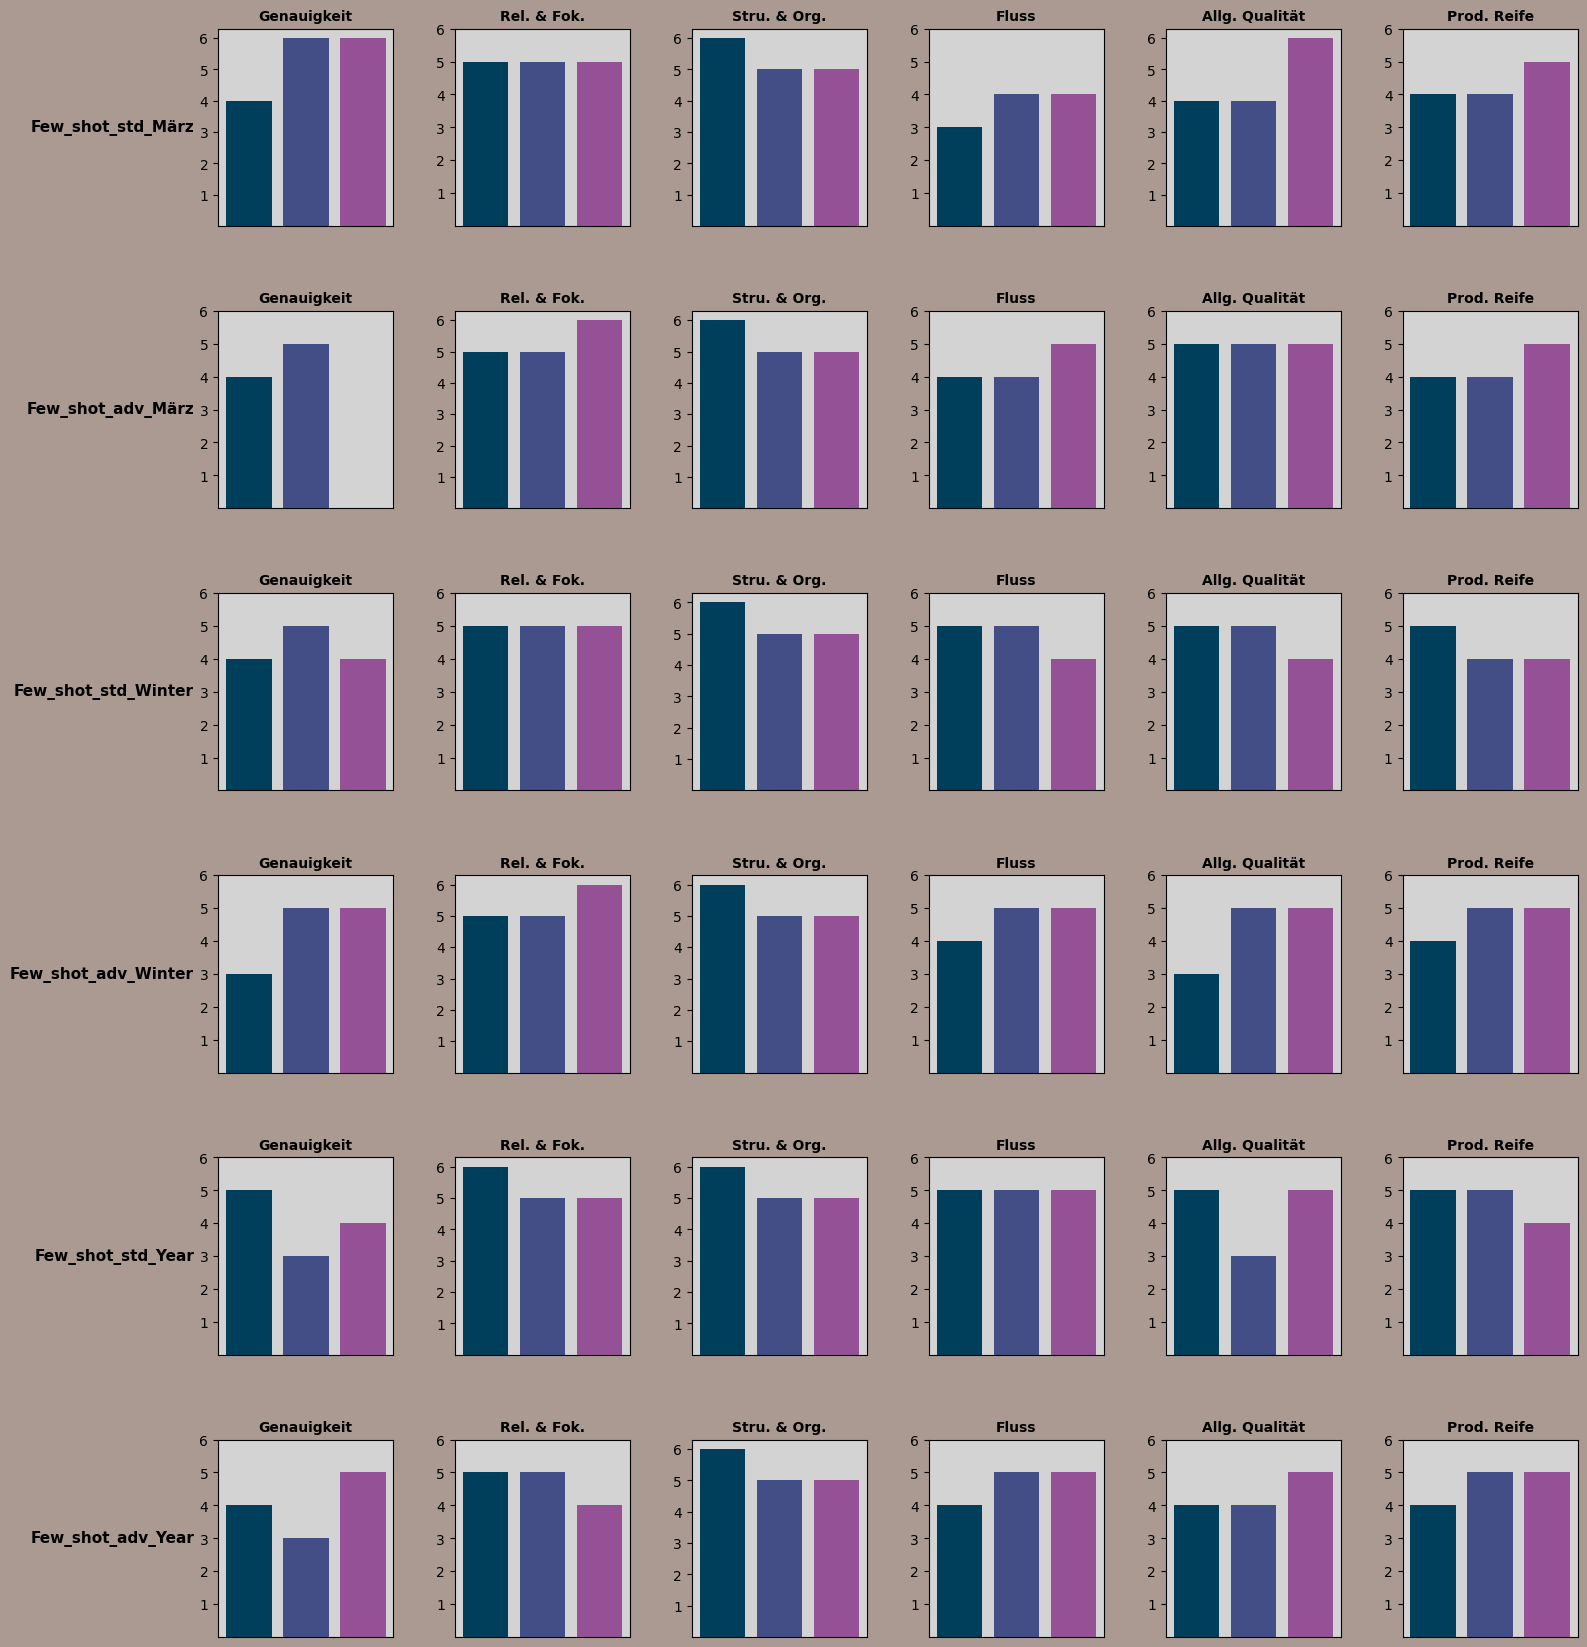

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Figure
fig, axes = plt.subplots(6, 6, figsize=(16, 18))

row_titles = ['Few_shot_std_März', 'Few_shot_adv_März', 'Few_shot_std_Winter', 
              'Few_shot_adv_Winter', 'Few_shot_std_Year', 'Few_shot_adv_Year']
color_pal = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"]
Header_names = ["Genauigkeit", "Rel. & Fok.", "Stru. & Org.", "Fluss", "Allg. Qualität", "Prod. Reife"]

fig.patch.set_facecolor('#aa9a92')

# DataFrame
df_test = df_val.copy()

for i in range(1, 7):
    cols = df_val[i].columns
    df_single = df_val[i].fillna(0).astype(int).reset_index(drop=True)
    
    for v, col in enumerate(cols):
        row_index = i - 1
        axes[row_index][v].set_facecolor('lightgrey')
        axes[row_index][v].bar(df_single[col].index, df_single[col], color=color_pal)
        axes[row_index][v].set_title(Header_names[v], fontsize=10, fontweight = "bold")
        axes[row_index][v].set_xticks([])
        axes[row_index][v].set_yticks([1, 2, 3, 4, 5, 6])

# Layout
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.05, hspace=0.35, wspace=0.35)

# Plots
for i in range(6):
    for j in range(6):
        pos = axes[i, j].get_position()
        # Width & Height
        size = min(pos.width, pos.height)
        # Zentrieren der Plots
        new_x = pos.x0 + (pos.width - size) / 2
        new_y = pos.y0 + (pos.height - size) / 2
        axes[i, j].set_position([new_x, new_y, size, size])

# Titel
for i in range(6):
    left_pos = axes[i, 0].get_position().x0
    vert_pos = (axes[i, 0].get_position().y0 + axes[i, 0].get_position().y1) / 2
    
    fig.text(left_pos - 0.015, vert_pos, row_titles[i],
             fontsize=11, fontweight='bold',
             ha='right', va='center',
             rotation=0)

plt.show()

/tmp/ipykernel_3353702/1073352646.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/tmp/ipykernel_3353702/1073352646.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/tmp/ipykernel_3353702/1073352646.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/tmp/ipykernel_3353702/1073352646.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/tmp/ipykernel_3353702/1073352646.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

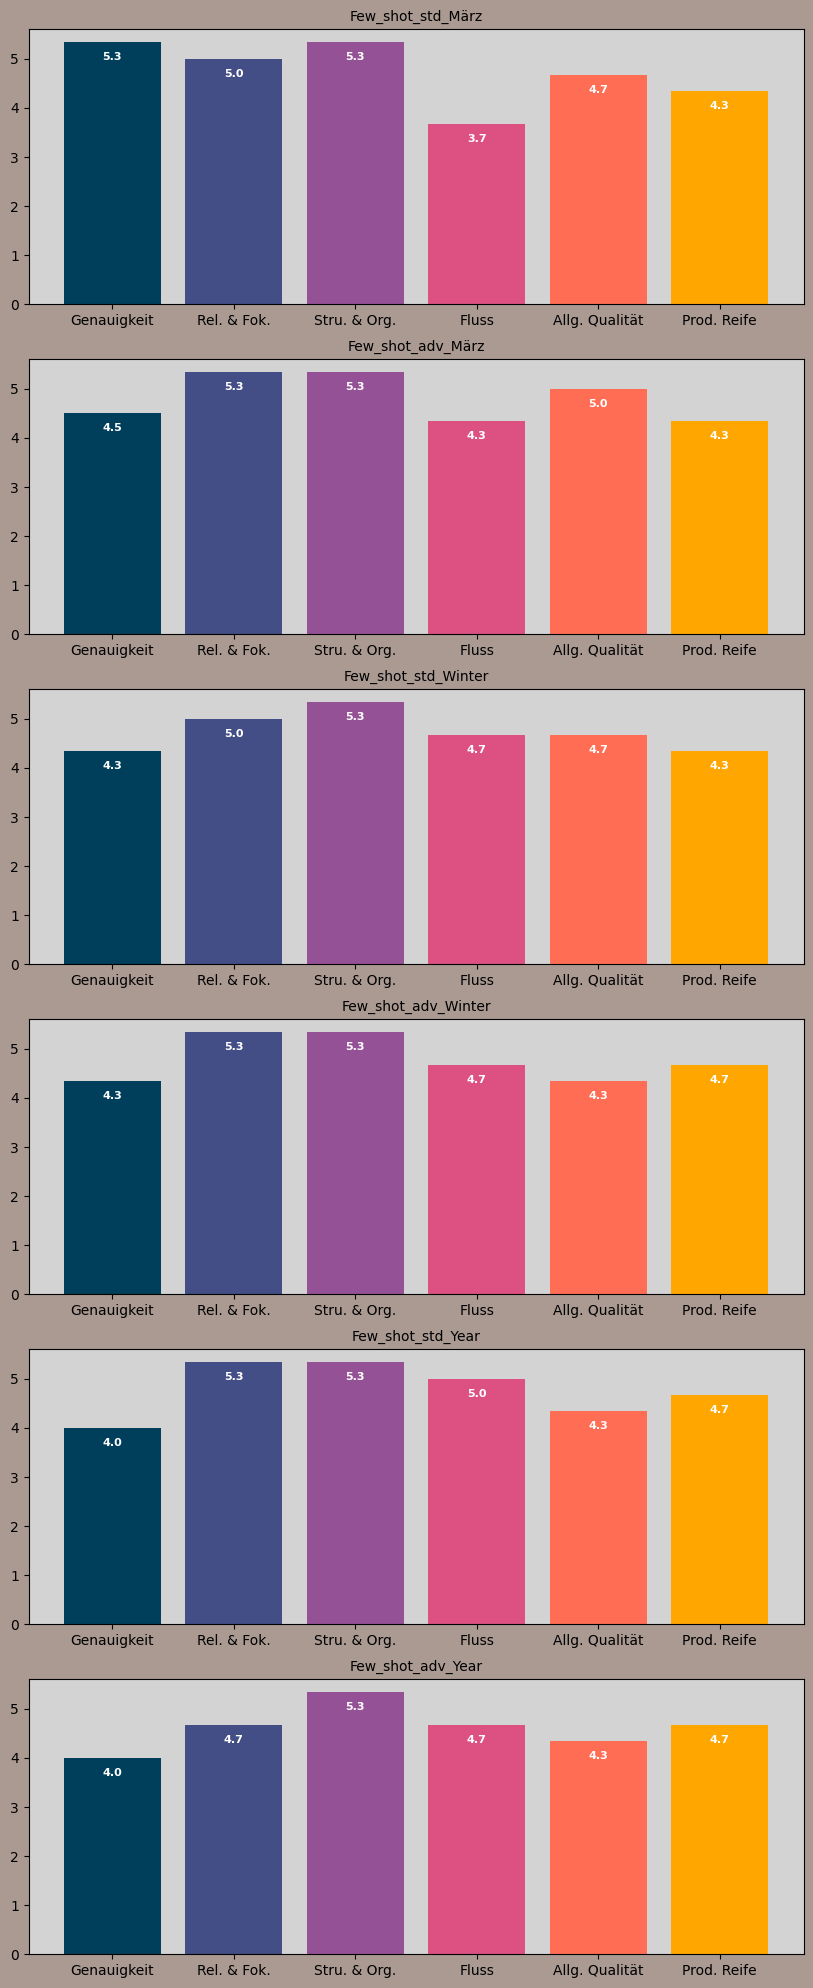

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(10, 25))
row_titles = ['Few_shot_std_März', 'Few_shot_adv_März', 'Few_shot_std_Winter', 
              'Few_shot_adv_Winter', 'Few_shot_std_Year', 'Few_shot_adv_Year']
Header_names = ["Genauigkeit", "Rel. & Fok.", "Stru. & Org.", "Fluss", "Allg. Qualität", "Prod. Reife"]

color_pal = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"]

fig.patch.set_facecolor('#aa9a92')
df_test = df_val.copy()

axes = axes.flatten()  


for i in range(1, 7): 



    df_single = df_test[i].fillna(0).astype(int).reset_index(drop=True)

    df_single = df_single[df_single != 0].mean()
    index = i -1

    axes[index].set_facecolor('lightgrey') 
    axes[index].bar(df_single.index, df_single.values, color = color_pal,)
    axes[index].set_title(row_titles[index], fontsize = 10 )
    axes[index].set_xticklabels(Header_names)

    for i, bar in enumerate(axes[index].patches):  
        height = bar.get_height() 
        axes[index].text(bar.get_x() + bar.get_width() / 2, height - 0.2,  
                     str(round(df_single.iloc[i], 1)), color = "white", ha='center', va='top', fontsize=8, fontweight="bold")
        



plt.subplots_adjust(hspace=0.2, wspace=0.2) 
plt.show()

/tmp/ipykernel_3353702/1552484936.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)
/tmp/ipykernel_3353702/1552484936.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(Header_names)


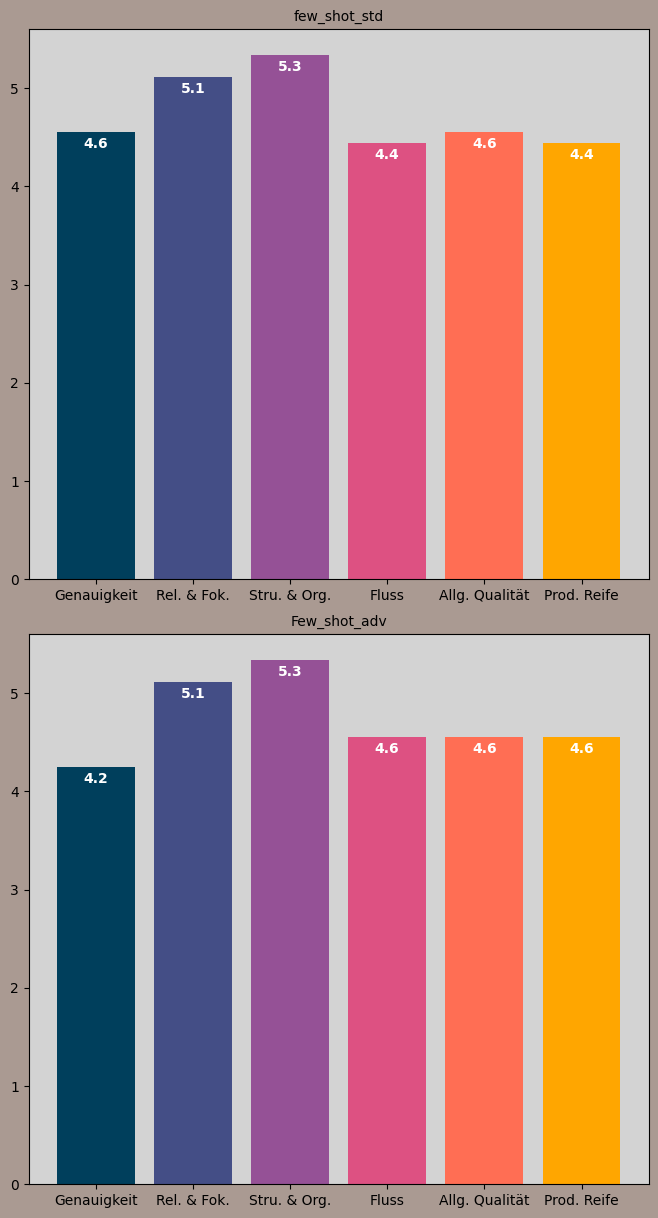

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(8, 15))
row_titles = ['few_shot_std', 'Few_shot_adv']
Header_names = ["Genauigkeit", "Rel. & Fok.", "Stru. & Org.", "Fluss", "Allg. Qualität", "Prod. Reife"]

color_pal = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"]

fig.patch.set_facecolor('#aa9a92')
df_test = df_val.copy()

Groups = [[1,3,5], [2,4,6]]


df_groups = []

for group in Groups:

    df_prev = None

    for df_v in group:
        df_acc = df_test[df_v].fillna(0).astype(int).reset_index(drop=True)

        if df_prev is not None:
            df_prev = pd.concat([df_prev, df_acc], ignore_index=True)
        else:
            df_prev = df_acc

    df_groups.append(df_prev)


for i, group in enumerate(df_groups):
    df_single = group[group != 0].mean()
    index = i 

    axes[index].set_facecolor('lightgrey') 
    axes[index].bar(df_single.index, df_single.values, color = color_pal,)
    axes[index].set_title(row_titles[index], fontsize = 10 )
    axes[index].set_xticklabels(Header_names)

    
    for i, bar in enumerate(axes[index].patches):  
        height = bar.get_height()  #
        axes[index].text(bar.get_x() + bar.get_width() / 2, height - 0.05, 
                        str(round(df_single.iloc[i], 1)), color = "white", ha='center', va='top', fontsize=10, fontweight="bold")
        

    
plt.subplots_adjust(hspace=0.1, wspace=0.2) 
plt.show()

    
    
    